# <목차>  
1. 정규표현식은 사드세요 제발
1. 크롤링, 그런데 이제는 아름다운 스프를 곁들인, 
1. word2vec
1. Sentencepice
1. tokenizing & tfrecord
1. and what?

----------------

# 1. 정규표현식은 사드세요, 제발

## 1.1.0 Nothing is complete unless you put it in final shape.
- 정규표현식(Regex)
    - 당신에게 문제가 하나 있는데, 그 문제를 정규 표현식으로 풀겠다고 결정했습니다. 자, 이제 문제가 2개가 되었군요?

정규 표현식이라는 이름은 정규 문자열 식별을 수행하는 것에서 만들어진 이름이다. 주어진 문자열이 주어진 규칙에 의거해 볼 때 일치하고 있는지 여부를 판단하는 것에 사용되는 것이다. 이에 따라 정규 표현식은 긴 문서에서 전화번호, 이메일 등 정형화된 규칙을 가진 문자들을 검색할 때 매우 유용한 도구라고 할 수 있다.

그렇다면 정규 문자열은 무엇일까? 정규 문자열은 그냥 선형적인 규칙들이 연속해서 적용해 생성할 수 있는 문자열을 뜻한다고 할 수 있다.

### 1.1.1 메타문자

아무것도 없는 상태에서 정규 표현식을 만들 때에는 목표하는 문자열이 어떤 형태를 가지고 있는지 명확하게 나타낼 수 있는 단계의 목록을 만드는 것에서 시작해야 한다. 이하의 정규 표현식 기호들은 가장 흔하게 쓰이는 메타문자들이라고 할 수 있다.

# 이 부분 수정 必

1. * : 바로 앞에 있는 문자, 하위 표현식, 대괄호로 묶인 문자들이 0번 이상 나타남
    - ex) a*b*
    - 일치하는 문자열 예제: aaaaaaaaaa,aaabbbbbb,bbbbbbb

1. + : 바로 앞에 있는 문자, 하위 표현식, 대괄호로 묶인 문자들이 1번 이상 나타남
    - a+b+
    - aaaaaaaaaab, aaabbbb,abbbbbbb
    
1. [] :  대괄호 안에 있는 문자 중 하나가 나타남.
    - [A-Z]
    - APPLE, CAPITALS, QWERTY

1. ( ) : 그룹으로 묶인 하위 표현식. 정규 표현식 평가 시 하위 표현식이 우선적으로 평가된다.
    - (a*b)
    - aaabaab, abaab, ababaaaaab
    
1. {m,n}:바로 앞에 있는 문자, 하위 표현식, 대괄호로 묶인 문자들이 m번 이상, n번 이하로 나타남.
    - a{2,3}b{2,3}
    - aabbb, aaabbb, aabb

1. [^ ] : 대괄호 속 문자를 제외한 문자가 나타남.
    - [^A-Z]*
    - apple, lower case, qwerty
    
1. | : shift + 역슬래쉬 버튼을 누르면 나오는 문자이다. 이름은 파이프이다.(알파벳 l이 아니다!) 분명히 가운데가 뚫려서 작대기가 2개 있는 형태인데 이와 같이 출력되는 프로그램을 본 적이 없다. 왜 그런걸까? 여튼 |로 분리된 문자, 문자열, 혹은 하위식들은 이 중 하나가 나타난다. 논리학 기호로 따지면 합집합의 개념 V, 혹은 OR로 분류되는 개념이라고 생각할 수도 있다. 
    - b(a|i|e)d
    - bad, bid, bed

1. . : 문자 하나(글자, 숫자, 기호, 공백 등)이 나타난다.
    - b.d
    - bad, bzd, b$d, b d

1. ^ : 바로 뒤에 있는 문자 혹은 하위 표현식이 문자열의 맨 앞에 나타난다.
    -  ^a
    - apple, asdf, asg

1. \ : 역슬래쉬, 특수 문자를 본래의 의미대로 쓰게 하는 escape 문자이다. 
    - \. ,\|, \\
    - . | \
    
1. $ : 정규 표현식 마지막에 종종 쓰인다. 바로 앞에 있는 문자 또는 하위 표현식이 문자열의 마지막이라는 뜻이다. 이 기호를 사용하지 않는다면 사실상 *이 식의 마지막에 있는 것과 같은 이치이기 때문에 이 뒤에 무엇이 있든 전부 일치하게 된다. ^ 기호의 반대이기도 하다.
    - [A-Z]*[a-z]*$
    - ABCabc, zzzyx, Bob

1. ?!: '포함하지 않는다'라는 의미이다. 이 기호 쌍 후의 문자, 혹은 표현식은 해당 위치에 나타나지 않는다.  
이 문자를 사용하기 위해서는 처음과 끝을 잘 설정해 줘야 한다. 배제한 문자가 문자열의 다른 부분에도 나타날 수 있기 때문이다.
    - ^((?![A-Z]).)&$
    - no-caps-here, $ymb0ls a4e f!ne
    - 이 부분 추후 수정해야 한다. 달러 표시가 어떤 작용을 하는지 잘 모르는데 markdown이 이상하게 출력이 된다

### 1.1.2 re 모듈의 함수들

1. match(패털, 문자열, 플래그)
1. search(패턴, 문자열, 플래그)
1. findall(패턴, 문자열, 플래그)
1. finditer(패턴, 문자열, 플래그)
1. fullmatch(패턴, 문자열, 플래그)
1. split(패턴, 문자열, 최대 split 수, 플래그)
1. sub(패턴, 교체할 문자열, 문자열, 최대 교체 수, 플래그)
1. subn(패턴, 교체할 문자열, 문자열, 최대 교체 수, 플래그)
1. compile(패턴, 플래그)
1. escape(패턴)

In [ ]:
import re

- re.match(pattern, string, flags=0)
    - string의 시작 부분에서 0개 이상의 문자가 정규식 pattern에 일치하면 해당 일치 객체를 반환한다. 문자열이 패턴과 일치하지 않으면 None을 반환한다. (반환하지 않는다는 뜻 같다) 
        - 아직까지 잘 이해가 안되는 점은 위에서 None을 반환한다는 점과 길이가 0인 일치와 다르다는 것을 유의하라는 말이다. 결과론적으로는 아무것도 반환하지 않는다는 것은 같을지언데, 뒤에서 다른 유의미한 차이값을 산출하는건가... 라는 정도로 추측할 수 밖에 없다. 지금까지는,

In [ ]:
# re.match
# 아무런 반응이 없는 경우, None을 출력했다고 할 수 있다.
string = "lololo"
re.match("olo", string)

In [ ]:
#처음 앞부분 알파벳 3개를 잡아내는 모습
re.match("lol", string)

<re.Match object; span=(0, 3), match='lol'>

- search(pattern, string, flags=0)
string의 검색을 통해 정규식의 pattern과 일치하는 첫번째 부분들 찾고 이에 일치하여 대응하는 객체를 반환한다. 아무것도 일치하지 않으면  None을 반환한다. 나머지는 match 함수와 같다.

In [ ]:
#re.search
    # stirng 전체를 검색한다.
string = "lololo"
re.search("olo", string)

<re.Match object; span=(1, 4), match='olo'>

- re.findall
    - string에서 겹치지 않는 pattern의 모든 일치를 문자열 리스트로 변환한다. 
    - stirng은 왼쪽에서 오른쪽으로 스캔되어지며, 일치는 찾는 순서에 따라 반환된다. 
    - 하나 이상의 그룹이 패턴에 있으면, 그룹 리스트로 반환되며, 그룹이 두개 이상이면 튜플 리스트가 된다.

In [ ]:
string = "lololo"
re.findall("olo", string)

['olo']

- finditer(pattern, string, flags=0)
    - string 전체를 검색하여 정규식 pattern과 일치하는 부분을 반복 가능한 match 객체, 이터레이터로 반환한다. 
    - re.findall과 비슷하지만, 문자열 리스트 대신 match object 리스트를 반환한다는 점에서 차이점이 있다.

In [ ]:
AIter = re.finditer('ol', string)
print(AIter)
for iter in AIter:
    print(iter)
    print(iter.group())

<re.Match object; span=(1, 3), match='ol'>
ol
<re.Match object; span=(3, 5), match='ol'>
ol


- sub(pattern, repl, string, count=0, flags=0)
    - string에서 일치되는 부분을 repl(바꿀 문자열 부분)에 있는 것들로 교체(치환)한다. 
    - repl 부분은 문자열일수도 있지만, 함수가 될 수도 있다. 
        - 문자열 부분이면, 역 슬래시 이스케이프 처리가 실행된다.
 

In [ ]:
# sub 1) 문자열 치환의 경우

re.sub(r'def\s+([a-zA-Z_][a-zA-Z_0-9]*)\s*\(\s*\):',
       r'static PyObject*\npy_\1(void)\n{',
       'def myfunc():')

'static PyObject*\npy_myfunc(void)\n{'

## 2 Crawling & BeautifulSoup
- 파이썬과 html을 연결하는 다리

### 2.1 웹 스크레퍼의 제작: 시작은 연결부터
    - 가장 단순한 모양부터 에러 해결까지.

In [ ]:
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error import HTTPError
import warnings
warnings.filterwarnings('ignore')

##### 들어가기에 앞서
- 알아서 전혀 쓸모 없는거 같은데 그냥 궁금해서 찾아본 것에 대하여: urllib과 urllib2
    - 본래 파이썬 버전 2에서는 urllib2을 사용했다. 
    - 파이썬 3버전이 상용화된 후 urllib2는 urllib으로 바뀌었고, 이하 서브 모듈들로 분화되었다.
        - urllib.parse
        - urllib.error
        - urllib.robotparser
        - urllib.request

#### 2.1.1 BeautifulSoup객체의 구조
- BeautifulSoup의 가장 신기한 점은 위와 같다. h1만을 가지고 오기 위해서는 bsObj.h1을 써도 되지만, html.body.h1을 써도 된다는 것이다. 
- 아래 웹페이지의 구조는 다음과 같다.
- html

    1. head 

    1. title

    1. body

        1. h1

        1. div



In [ ]:
html = urlopen('http://www.pythonscraping.com/pages/page1.html')
bsObj = BeautifulSoup(html.read(), 'html.parser')
print(bsObj)
print('----------------------------------------------------------------------------')
print(bsObj.h1)
print(bsObj.html.body.h1)
print(bsObj.html.h1)

<html>
<head>
<title>A Useful Page</title>
</head>
<body>
<h1>An Interesting Title</h1>
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>
</body>
</html>

----------------------------------------------------------------------------
<h1>An Interesting Title</h1>
<h1>An Interesting Title</h1>
<h1>An Interesting Title</h1>


#### 1.1.2 정규표현식과 BeautifulSoup의 만남에 대하여

In [ ]:
html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bsObj = BeautifulSoup(html, 'html.parser')

In [ ]:
print(bsObj)

<html>
<head>
<style>
img{
	width:75px;
}
table{
	width:50%;
}
td{
	margin:10px;
	padding:10px;
}
.wrapper{
	width:800px;
}
.excitingNote{
	font-style:italic;
	font-weight:bold;
}
</style>
</head>
<body>
<div id="wrapper">
<img src="../img/gifts/logo.jpg" style="float:left;"/>
<h1>Totally Normal Gifts</h1>
<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.<p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
123 Main St.<br/>
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) frien

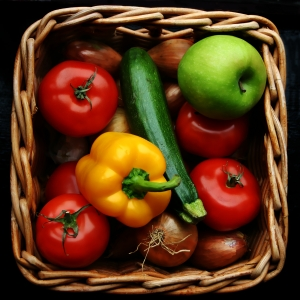

In [ ]:
from IPython.display import Image
Image(filename='img1.jpg') 

- 이 사진과 같이 웹페이지 내에 있는 다수의 상품사진만을 가지고 오고 싶다 생각해보자, 관련한 내용은 
    - img src="../img/gifts/img1.jpg"
    - img src="../img/gifts/img2.jpg"/
    - img src="../img/gifts/img3.jpg"/
    - img src="../img/gifts/img4.jpg"/
    - img src="../img/gifts/img5.jpg"/
    - img src="../img/gifts/img6.jpg"/
- 이렇게 총 6개를 가져와야 한다.

In [ ]:
html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bsObj=BeautifulSoup(html, 'html.parser')

#이 코드는 ../img/gifts/img로 시작해서 .jpg로 끝나는 이미지의 상대 경로만을 출력한다.
images = bsObj.findAll('img', {'src':re.compile('\.\.\/img\/gifts/img.*\.jpg')})

for image in images:
    print(image['src'])



../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


#### 1.1.3 속성에 접근하기

#### 1.1.4 람다 표현식

### 1.2 에러들에 대처하는 경험적인 방법들

- 그 동안 만난, 가장 흔한 에러는 크게 2가지이다.  
    1. 페이지를 찾을 수 없거나, URL 해석에서 에러가 생긴 경우
    1. 서버를 찾을수 없는 경우

- 1번 상황에서는 HTTP 에러가 반환된다. 
    - 404 Page Not Found, 500 Internal Server Error의 원인이 바로 이 친구이다. 
        - (랜섬웨어를 따돌리며 유유히 다크웹을 활강하다 보면 가장 흔하게 마주치는 친구이기도 하다.) 
    - 이 에러는 다음과 같이 처리할 수 있다.

In [ ]:
#Null을 반환하거나, break문을 실행하거나, 기타 다른 방법을 사용하는 경우

try:
    #404 Error가 발생하는 곳으로 접속을 시도하는 경우
    http = urlopen('http://www.pythonscraping.com//pages/error.html') 
except HTTPError as e:
    print(e) #이에 따라 에러문이 출력된다.
    
#만약 정상적으로 접근한다면 프로그램을 계속 실행한다.
    #만약 except 절에서 return이나 break을 사용했다면 이 else 절은 필요없다.
else:
    print('진입!')

HTTP Error 404: Not Found


## 2번째로 넘어가기 전에

BeautifulSoup 객체에 들어 있는 태그에 접근할 때마다 그 태그가 실제 존재하는 것인지 점검하는 역할이 필요하다. 
- 존재하지 않는 태그에 접근을 시도하는 경우에는 None 객체를 반환한다. 문제는 None 객체 자체에 태그가 있다고 가정하고 그 태그에 접근하면 AttributeError가 일어나게 된다.
    - 모든 웹페이지에는 nonExistentTag가 있다고 하자. 이는 존재한다고 가정하는 태그이며, 실제 BeautifulSoup의 함수 이름은 아니다.

In [ ]:
print(bsObj.nonExistentTag)

None


문제는 아래처럼 None이 반환될 가능성을 무시하고 None 객체에 어떤 함수(someTag)를 호출하는 경우이다.

In [ ]:
print(bsObj.nenExistenTag.someTag)

AttributeError: 'NoneType' object has no attribute 'someTag'

In [ ]:
try:
    badContent = bsObj.nonExistingTag.anothertTag
except AttributeError as e:
    print('Tag was not found')
else:
    if badContent == None:
        print('Tag was not found')
    else:
        print(badContent)

Tag was not found


### 추가: 코드를 수정해 가능한 에러를 체크하고 처리할 수 있게 만든 스크레이퍼

In [ ]:
def Title(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
        return None
    try:
        bsObj = BeautifulSoup(html.read(), "html.parser")
        title = bsObj.h1
    
    except AttributeError as e:
        return None
    
    return title

title = Title("http://pythonscraping.com/pages/warandpeace.html")

if title == None:
    print("Title could not be found")

else:
    print(title)

<h1>War and Peace</h1>


## 1.3 복수의 웹페이지 한번에 가져오기

- 크롤링의 정수는 정제 가능한 대량의 데이터들을 파이썬 안으로 손 쉽게 가지고 올 수 있다는 것에 있다. 
    - (이에 대해 파생되는 여러가지 문제와는 별개로 말이다. 이와 관련된 사항은 구글에서 내놓은 robots.txt를 참고해야 하며, 특히나 대기업의 웹페이지를 건드릴 때에는 전례를 잘 살펴야 한다. 실형을 선고받은 사례도 있으니 말이다.)
- 웹 크롤러라는 이름 자체에서 알 수 있듯이, 이 로봇의 핵심은 재귀에 있다. 
    - URL에서 페이지를 가져오고, 그 페이지를 검사해 다른 URL을 찾은 뒤, 다시 그 페이지를 가져오는 작업을 무한하게 반복하는 것이다.

### 1.3.1 단일 페이지 내에서의 이동

처음에는 나무위키를 해보려 했지만, 부하 문제를 생각해보니 그냥 서버가 넉넉한 위키피디아를 시도해보는게 좋을 듯 해서 급선회했다는 것이 학계의 점심

In [ ]:
html = urlopen('http://en.wikipedia.org/wiki/Kevin_Bacon')
bsObj = BeautifulSoup(html, 'html.parser')
for link in bsObj.findAll('a'):
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/Wikipedia:Protection_policy#semi
#mw-head
#searchInput
/wiki/Kevin_Bacon_(disambiguation)
/wiki/File:Kevin_Bacon_SDCC_2014.jpg
/wiki/Philadelphia,_Pennsylvania
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
#cite_note-1
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
/wiki/Holly_Near
http://baconbros.com/
#cite_note-2
#cite_note-actor-3
/wiki/Footloose_(1984_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Balto_(film)
/wiki/Sleepers
/wiki/The_Woodsman_(2004_film)
/wiki/Animal_House
/wiki/Diner_(1982_film)
/wiki/Tremors_(1990_film)
/wiki/Crazy,_Stupid,_Love
/wiki/Friday_the_13th_(1980_film)
/wiki/Flatliners
/wiki/The_River_Wild
/wiki/Wild_Things_(film)
/wiki/Stir_of_Echoes
/wiki/Hollow_Man
/wiki/Frost/Nixon_(film)
/wiki/X-Men:_First_Class
/wiki/Black_Mass_(film)
/wiki/Patriots_Day_(film)
/wiki/Fox_Broadcasting_Company
/wiki/The_Following
/wiki/HBO
/wiki/Taking_Chance
/wiki/Golden_Globe_Award
/wiki/Screen_Actors_Guild_Award
/w

너무 다양하고, 쓸모없는 정보들이 함께 섞여있다.    
우리는 정말로 필요한 부분들만 솎아서 뽑아내야한다.  
어떻게 해야할까? 아마 위의 코드에서 조금 더 응용한다면 가능할 것이다.

In [ ]:
html = urlopen('http://en.wikipedia.org/wiki/Kevin_Bacon')
bsObj = BeautifulSoup(html, 'html.parser')
for link in bsObj.find(
    'div', {'id':'bodyContent'}).findAll(
    'a', href = re.compile('^(/wiki/)((?!:).)*$')):
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/Kevin_Bacon_(disambiguation)
/wiki/Philadelphia,_Pennsylvania
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
/wiki/Holly_Near
/wiki/Footloose_(1984_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Balto_(film)
/wiki/Sleepers
/wiki/The_Woodsman_(2004_film)
/wiki/Animal_House
/wiki/Diner_(1982_film)
/wiki/Tremors_(1990_film)
/wiki/Crazy,_Stupid,_Love
/wiki/Friday_the_13th_(1980_film)
/wiki/Flatliners
/wiki/The_River_Wild
/wiki/Wild_Things_(film)
/wiki/Stir_of_Echoes
/wiki/Hollow_Man
/wiki/Frost/Nixon_(film)
/wiki/Black_Mass_(film)
/wiki/Patriots_Day_(film)
/wiki/Fox_Broadcasting_Company
/wiki/The_Following
/wiki/HBO
/wiki/Taking_Chance
/wiki/Golden_Globe_Award
/wiki/Screen_Actors_Guild_Award
/wiki/Primetime_Emmy_Award
/wiki/Streaming_television
/wiki/I_Love_Dick_(TV_series)
/wiki/Golden_Globe_Award_for_Best_Actor_%E2%80%93_Television_Series_Musical_or_Comedy
/wiki/The_Guardian
/wi

In [ ]:
import datetime
import random
random.seed(datetime.datetime.now())

In [ ]:
def getLinks(articleUrl):
    html = urlopen('http://en.wikipedia.org'+articleUrl)
    bsObj = BeautifulSoup(html, 'html.parser')
    
    return bsObj.find(
        'div', {'id':'bodyContent'}).findAll(
        'a', href = re.compile('^(/wiki/)((?!:).)*$'))

links =getLinks('/wiki/kevin_Bacon')
while len(links) > 0:
    newArticle = links[random.randint(0, len(links)-1)].attrs['href']
    print(newArticle)
    links = getLinks(newArticle)

/wiki/Judy_Garland
/wiki/Theme_from_San_Francisco
/wiki/Zing!_Went_the_Strings_of_My_Heart
/wiki/Gee,_Baby,_Ain%27t_I_Good_to_You
/wiki/Straighten_Up_and_Fly_Right
/wiki/This_Is_Us_(TV_series)
/wiki/Jon_Huertas
/wiki/Lily_James
/wiki/Burnt_(film)
/wiki/Daniel_Br%C3%BChl
/wiki/Teen_Choice_Awards
/wiki/One_Direction
/wiki/The_X_Factor_(British_series_7)
/wiki/Katy_Perry
/wiki/Gwen_Stefani
/wiki/Fiddler_on_the_Roof
/wiki/Alan_Ayckbourn
/wiki/Worthing
/wiki/Findon_Valley
/wiki/High_Salvington_Windmill
/wiki/Moulton_Windmill
/wiki/Sutton,_Norfolk
/wiki/Norfolk_Broads
/wiki/Fritton_(near_Great_Yarmouth)
/wiki/Norfolk
/wiki/Post-glacial_rebound
/wiki/Alby,_%C3%96land
/wiki/Hulterstad
/wiki/Tune_ship
/wiki/Lindholm_H%C3%B8je
/wiki/Scandinavia
/wiki/Fennoscandia
/wiki/Geographic_coordinate_system
/wiki/40th_meridian_east
/wiki/50th_meridian_east
/wiki/25th_parallel_south
/wiki/Australia
/wiki/Second_World_War
/wiki/Last_battle_of_the_battleship_Bismarck
/wiki/Military_history_of_Gibraltar_durin

KeyboardInterrupt: 

### 1.3.1 특정 페이지, 혹은 특정 일자의 기사를 모두 크롤링 하는 방식

수업 때 했던 직접적인  내용이라 일단 패쓰, 새로운 내용 추가할 것이 딱히 없음.

### 1.3.2 다양한 페이지들을 이동하며 크롤링하는 방식

In [ ]:
bsObj = BeautifulSoup(html, "html.parser")
print(bsObj.h1)

NameError: name 'html' is not defined

In [ ]:
nameList = bsObj.findAll('span', {'class': 'green'})
for name in nameList:
    print(name.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


# 3. Word2Vec

사실 Word2Vec을 이해하기 위해선 이 기법이 왜 만들어졌는지 알아야 할 필요성이 있다. 필요가 있으니 개발이 되었을테니 말이다.  
간단하게 말하면 이전에 사용되었던 one-hot-encoding 방식 등의 vectorization 기법들이 가지고 있는 치명적인 단점은 단어 사이의 유사도를 구별할 수 없었기 때문이라고 할 수 있다. 즉, Word2Vec 기법 이전의 방법들을 통해서는 단어의 중요도, 혹은 문서 안에서의 중요도는 구분할 수 있었지만 유사도는 불가능했기 때문이다.

그렇다면 Word2Vec이 가장 큰 특장점은 무엇일까, 그것은 임베딩(embedding)이다. 단어를 벡터로 만들어 분산 표현 시 유사도 같은 계산을 가능케 하는 것이다. 원핫인코딩을 통한 벡터는 차원의 저주에 빠져버리게 된다.  
(참 이름 잘 지었다. 벡터 깊숙히 쑤셔 넣는다는 의미가 아닌가. 본래 코드보다는 활자를 더 좋아했던 사람의 입장에서 이런 네이밍센스를 보면 영어가 참 단순하면서도 효율적인 언어인 듯 싶다.)  

Word2Vec의 가장 큰 효과는 단어의 벡터화 과정에서 문맥이 사라지지 않는다는 것이다. 즉, 벡터화된 단어들의 거리는 여러 방식을 통해 측정할 수 있고, 그 뺄셈의 결과값이 적을수록 우리는 그 단어들이 가까운 의미를 지니고 있다고 평가할 수 있게 된다.

In [ ]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

In [ ]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
words = ["car","bike","book","magazine","queen","king"]
word2vecs = [wv[i] for i in words]
 

 # 단어간 유사도 확인
print(f"bike and car : {wv.similarity(w1='bike', w2='car')}")
print(f"bike and magazine : {wv.similarity(w1='bike', w2='magazine')}")

bike and car : 0.5854153633117676
bike and magazine : 0.03112519159913063


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xy = pca.fit_transform(word2vecs)
x = xy[:,0]
y = xy[:,1]

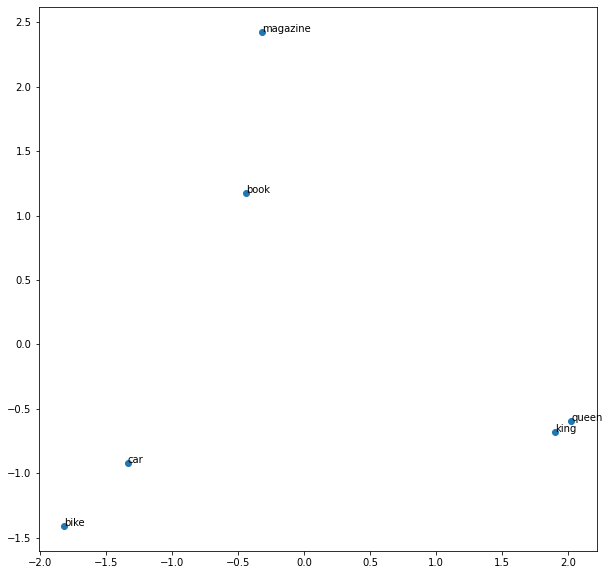

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.scatter( x, y, marker = 'o')
for i, v in enumerate(words):
    plt.annotate(v, xy=(x[i], y[i]))

# 4. BPE 알고리즘과 tfrecord

In [ ]:
cd /content/drive/MyDrive/1,2주차 정리

/content/drive/MyDrive/1,2주차 정리


In [ ]:
import os
print(os.getcwd())

/content/drive/MyDrive/1,2주차 정리


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## BPE(Byte Pair Encoding)

- 바이트 페어 인코딩(BPE)는 본래 정보 압축을 위해 만들어진 알고리즘이다. 하지만 자연어 처리 모델에서는 토큰화 기법으로 사용되고 있다. 
    - 3주차부터 학습했던 BERT 모델에서는 토크나이저로 BPE의 파생모델인 워드피스(WordPiece)를 사용하고 있다. 

- BPE를 한마디로 정의하자면 데이터에서 가장 많이 등장한 문자열을 병합해 문자열을 점차 압축해 가는 기법이다.
    - 특징으로는 분석 대상이 되는 언어에 대해 지식이 필요 없다는 것이다. 말뭉치에서 자주 나타나는 문자열(subword)을 token으로 분석, 병합 후 어휘 사전에 추가하기 때문이다. 

### SentencePiece(센텐스피스)

센텐스피스는 사전 토큰화 작업 없이 단어 분리, 토큰화를 수행함에 따라 언어에 따른 단어 토큰화 난도 차이를 보이지 않는다는 점에서 가장 큰 이점이 있다. 이는 한국어의 형태적 특징에 따른 자연어 처리의 어려움을 일부 극복할 수 있음을 의미한다.

##### 참고: 한글의 문법적 특징 中 형태적 특징에 대하여

1. 조사와 어미가 발달했다. 
    - 한글은 사전적이고 어휘적 뜻을 나타내는 실질 형태소(체언, 용언의 어간)에 문법 형태소(조사와 용언의 어미)를 실현시켜 문장을 만든다. 이 때문에 국어를 언어 유형상 첨가어로 분류하기도 한다. 
    - 가령 ‘아버지 유리창 깨’는 문장이 되지 않는데, 각각 조사와 어미를 붙이면 ‘아버지께서 유리창을 깨셨다’와 같이 한 의미를 지닌 문장이 된다. 
    - 조사는 격조사, 접속조사, 보조사 등이 있으며, 어미는 종결어미, 연결어미, 전성어미 등의 어말어미와 주체 높임, 시제 등의 기능을 하는 선어말 어미가 있다. 
2. 둘째, 단어 형성법이 발달했다. 
    - 단일어는 하나의 어근으로 이뤄진 단어고 복합어는 두 개 이상의 어근 혹은 어근에 파생 접사가 붙어서 이뤄진 단어다.
    - (이쪽 사회에서는 보통 '교착어'의 특징이라고 하는 듯 하다. 왜 다른지는 잘 모르겠지만 뭔가 이유가 있어서 그러려니 하고 있다.) 
    - 여튼 어근끼리 붙으면 합성어, 어근과 파생 접사가 붙으면 파생어라 한다. 이를 만드는 과정을 단어 형성법(조어법)이라 한다. 
    - 단일어의 비율이 극도로 높으면 어휘적 언어이고, 복합어의 비율이 극도로 높으면 문법적 언어인데, 한국어는 문법적 언어에 가깝다고 할 수 있다.
3. 수능을 치룰 시절부터 언어영역 2,3페이지에 있던 문법 문제들을 영어 문법보다 어려워 했던 나는 어느정도 정리를 했음에도 머리에 잘 들어오지가 않는다. 그래서 스스로의 방식에 따라 다시 정리를 해보자면, '단어의 변화무쌍함을 아직 기계가 버거워한다.' 라는 정도로 정리할 수 있지 않을까 싶다.

In [2]:
pip install sentencepiece

     |████████████████████████████████| 1.2MB 8.3MB/s 


In [7]:
cd /content/drive/MyDrive/1,2주차 정리

/content/drive/MyDrive/1,2주차 정리


In [5]:
import pandas as pd
import sentencepiece as spm
import urllib.request
import csv

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f9e594f1e90>)

In [ ]:
naver_review = pd.read_table('ratings.txt')
naver_review[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [ ]:
print('리뷰 개수 :', len(naver_review))

리뷰 개수 : 200000


In [ ]:
print(naver_review.isnull().sum())

id          0
document    8
label       0
dtype: int64


In [ ]:
naver_review_dropna = naver_review.dropna(how='any')
print(naver_review_dropna.isnull().values.any())

False


In [ ]:
print(len(naver_review_dropna))

199992


In [ ]:
with open('naver_review_dropna.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(naver_review_dropna['document']))

1999,992개의 샘플을 naver_review_dropna.txt 파일에 저장한 뒤 sentencepiece를 통해 단어 집합을 생성한다.

In [ ]:
spm.SentencePieceTrainer.Train('--input=naver_review_dropna.txt --model_prefix=naver --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')

In [ ]:
spm.SentencePieceTrainer.Train(
    '--input=naver_review_dropna.txt \
    --model_prefix=naver \
    --vocab_size=5000 \
    --model_type=bpe \
    --max_sentence_length=9999')

vocab 생성 완료 후 naver.model, naver.vocab 파일 2개가 생성된다. vocab파일 내에서는 학습된 subwords를 확인할 수 있다.

In [8]:
vocab_list = pd.read_csv(
    'naver.vocab', 
    sep='\t', 
    header=None, 
    quoting=csv.QUOTE_NONE)
vocab_list[:5]

,0,1
0,<unk>,0
1,<s>,0
2,</s>,0
3,..,0
4,영화,-1


In [9]:
vocab_list.sample(10)

,0,1
2169,▁이어,-2166
3008,두고,-3005
1605,▁즐거,-1602
3730,석,-3727
156,▁반,-153
1841,▁뜬,-1838
1465,▁있지만,-1462
3310,재,-3307
4225,칸,-4222
4034,뇌,-4031


In [10]:
#총 5000개의 vocab이 있음을 확인
len(vocab_list)

5000

In [11]:
sp = spm.SentencePieceProcessor()
vocab_file = "naver.model"
sp.load(vocab_file)

True

In [12]:
lines = [
  "뭐 이딴 것도 영화냐.",
  "진짜 최고의 영화입니다 ㅋㅋ",
]
for line in lines:
  print(line)
  print(sp.encode_as_pieces(line))
  print(sp.encode_as_ids(line))
  print()

뭐 이딴 것도 영화냐.
['▁뭐', '▁이딴', '▁것도', '▁영화냐', '.']
[132, 966, 1296, 2590, 3276]

진짜 최고의 영화입니다 ㅋㅋ
['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ']
[54, 200, 821, 85]



In [13]:
sp.GetPieceSize()

5000

In [14]:
sp.IdToPiece(4)

'영화'

In [ ]:
sp.PieceToId('영화')

4

In [ ]:
sp.DecodeIds([54, 200, 821, 85])

'진짜 최고의 영화입니다 ᄏᄏ'

In [15]:
sp.DecodePieces(['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ'])

'진짜 최고의 영화입니다 ᄏᄏ'

In [ ]:
print(sp.encode('진짜 최고의 영화입니다 ㅋㅋ', out_type=str))
print(sp.encode('진짜 최고의 영화입니다 ㅋㅋ', out_type=int))

['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ']
[54, 200, 821, 85]


In [16]:
! git clone http://github.com/ondine0615/albert.git
% pip install -r albert/requirements.txt

Cloning into 'albert'...
remote: Enumerating objects: 359, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 359 (delta 0), reused 0 (delta 0), pack-reused 357
Receiving objects: 100% (359/359), 237.51 KiB | 6.25 MiB/s, done.
Resolving deltas: 100% (234/234), done.
     |████████████████████████████████| 92kB 6.1MB/s 
     |████████████████████████████████| 411.5MB 33kB/s 
     |████████████████████████████████| 3.8MB 47.8MB/s 
     |████████████████████████████████| 512kB 33.4MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=27499bd82ea238ad7776da57f7725033ef72bbcdb55c447adb503acf8b1bda08
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow

In [22]:
! python -m albert.create_pretraining_data \
--input_file=naver_review_dropna.txt \
--output_file=/content/drive/MyDrive/1,2주차 정리 \
--vocab_file=naver.vocab \
--spm_model_file=naver.model

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
INFO:tensorflow:using sentence piece tokenzier.
I0430 00:26:11.726056 139674981267328 tokenization.py:237] using sentence piece tokenzier.
INFO:tensorflow:using sentence piece tokenzier.
I0430 00:26:11.726696 139674981267328 tokenization.py:237] using sentence piece tokenzier.
INFO:tensorflow:using sentence piece tokenzier.
I0430 00:26:11.727432 139674981267328 tokenization.py:237] using sentence piece tokenzier.
INFO:tensorflow:using sentence piece tokenzier.
I0430 00:26:11.729344 139674981267328 tokenization.py:237] using sentence piece tokenzier.
INFO:tensorflow:using sentence piece tokenzier.
I0430 00:26:11.730123 139674981267328 tokenization.py:237] using sentence piece tokenzier.
INFO:tensorflow:using sentence piece tokenzier.
I0430 00:26:11.730787 139674981267328 tokenization.py:237] using sentence piece tokenzier.
INFO:tensorflow:using sentence piece tokenzier.
I0430 00:26:11.731499 139674981267328 tokenization.py:237] using sentence piece to

! for file in {이 부분은 채워 보세요} ; do python -m albert.create_pretraining_data --input_file=$file --output_file=${file}.tfrecord --vocab_file=/content/drive/MyDrive/{.vocab경로} --spm_model_file=/content/drive/MyDrive/{.model경로}; done